# **Credit Card Approval Prediction**

---



## AIM

In [1]:
import pandas as pd
df1 = pd.read_csv("application_record.csv")
df2 = pd.read_csv("credit_record.csv")

In [2]:
df1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


## Data Pre-processing

In [3]:
df2['STATUS'].value_counts()
# performed a value count on status to see how many values exist of each type

STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64

In [4]:
df2['STATUS'].replace({'C': 0, 'X' : 0}, inplace=True)
df2['STATUS'] = df2['STATUS'].astype('int')
df2['STATUS'] = df2['STATUS'].apply(lambda x:1 if x >= 2 else 0)

In [5]:
df3 = df2.groupby('ID').agg(max).reset_index()
df3.head()

C:\Users\megha\AppData\Local\Temp\ipykernel_22436\671320033.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df3 = df2.groupby('ID').agg(max).reset_index()


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001712,0,0
2,5001713,0,0
3,5001714,0,0
4,5001715,0,0


In [6]:
merged_df = pd.merge(df1,df3, on='ID')
print(merged_df.head())
merged_df.to_csv('mergedData.csv', index=False)

        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005 

In [7]:
merged_df.isnull().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
MONTHS_BALANCE             0
STATUS                     0
dtype: int64

In [8]:
merged_df.drop('OCCUPATION_TYPE', axis=1, inplace=True)

In [9]:
merged_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,-22,0


In [10]:
merged_df['STATUS'].value_counts()

STATUS
0    35841
1      616
Name: count, dtype: int64

In [11]:
merged_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,-22,0


In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [13]:
merged_df.nunique()

ID                     36457
CODE_GENDER                2
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
CNT_CHILDREN               9
AMT_INCOME_TOTAL         265
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_FAMILY_STATUS         5
NAME_HOUSING_TYPE          6
DAYS_BIRTH              7183
DAYS_EMPLOYED           3640
FLAG_MOBIL                 1
FLAG_WORK_PHONE            2
FLAG_PHONE                 2
FLAG_EMAIL                 2
CNT_FAM_MEMBERS           10
MONTHS_BALANCE            61
STATUS                     2
dtype: int64

## Exploratory Data Analysis

#### PAIR PLOT

<Figure size 800x600 with 0 Axes>

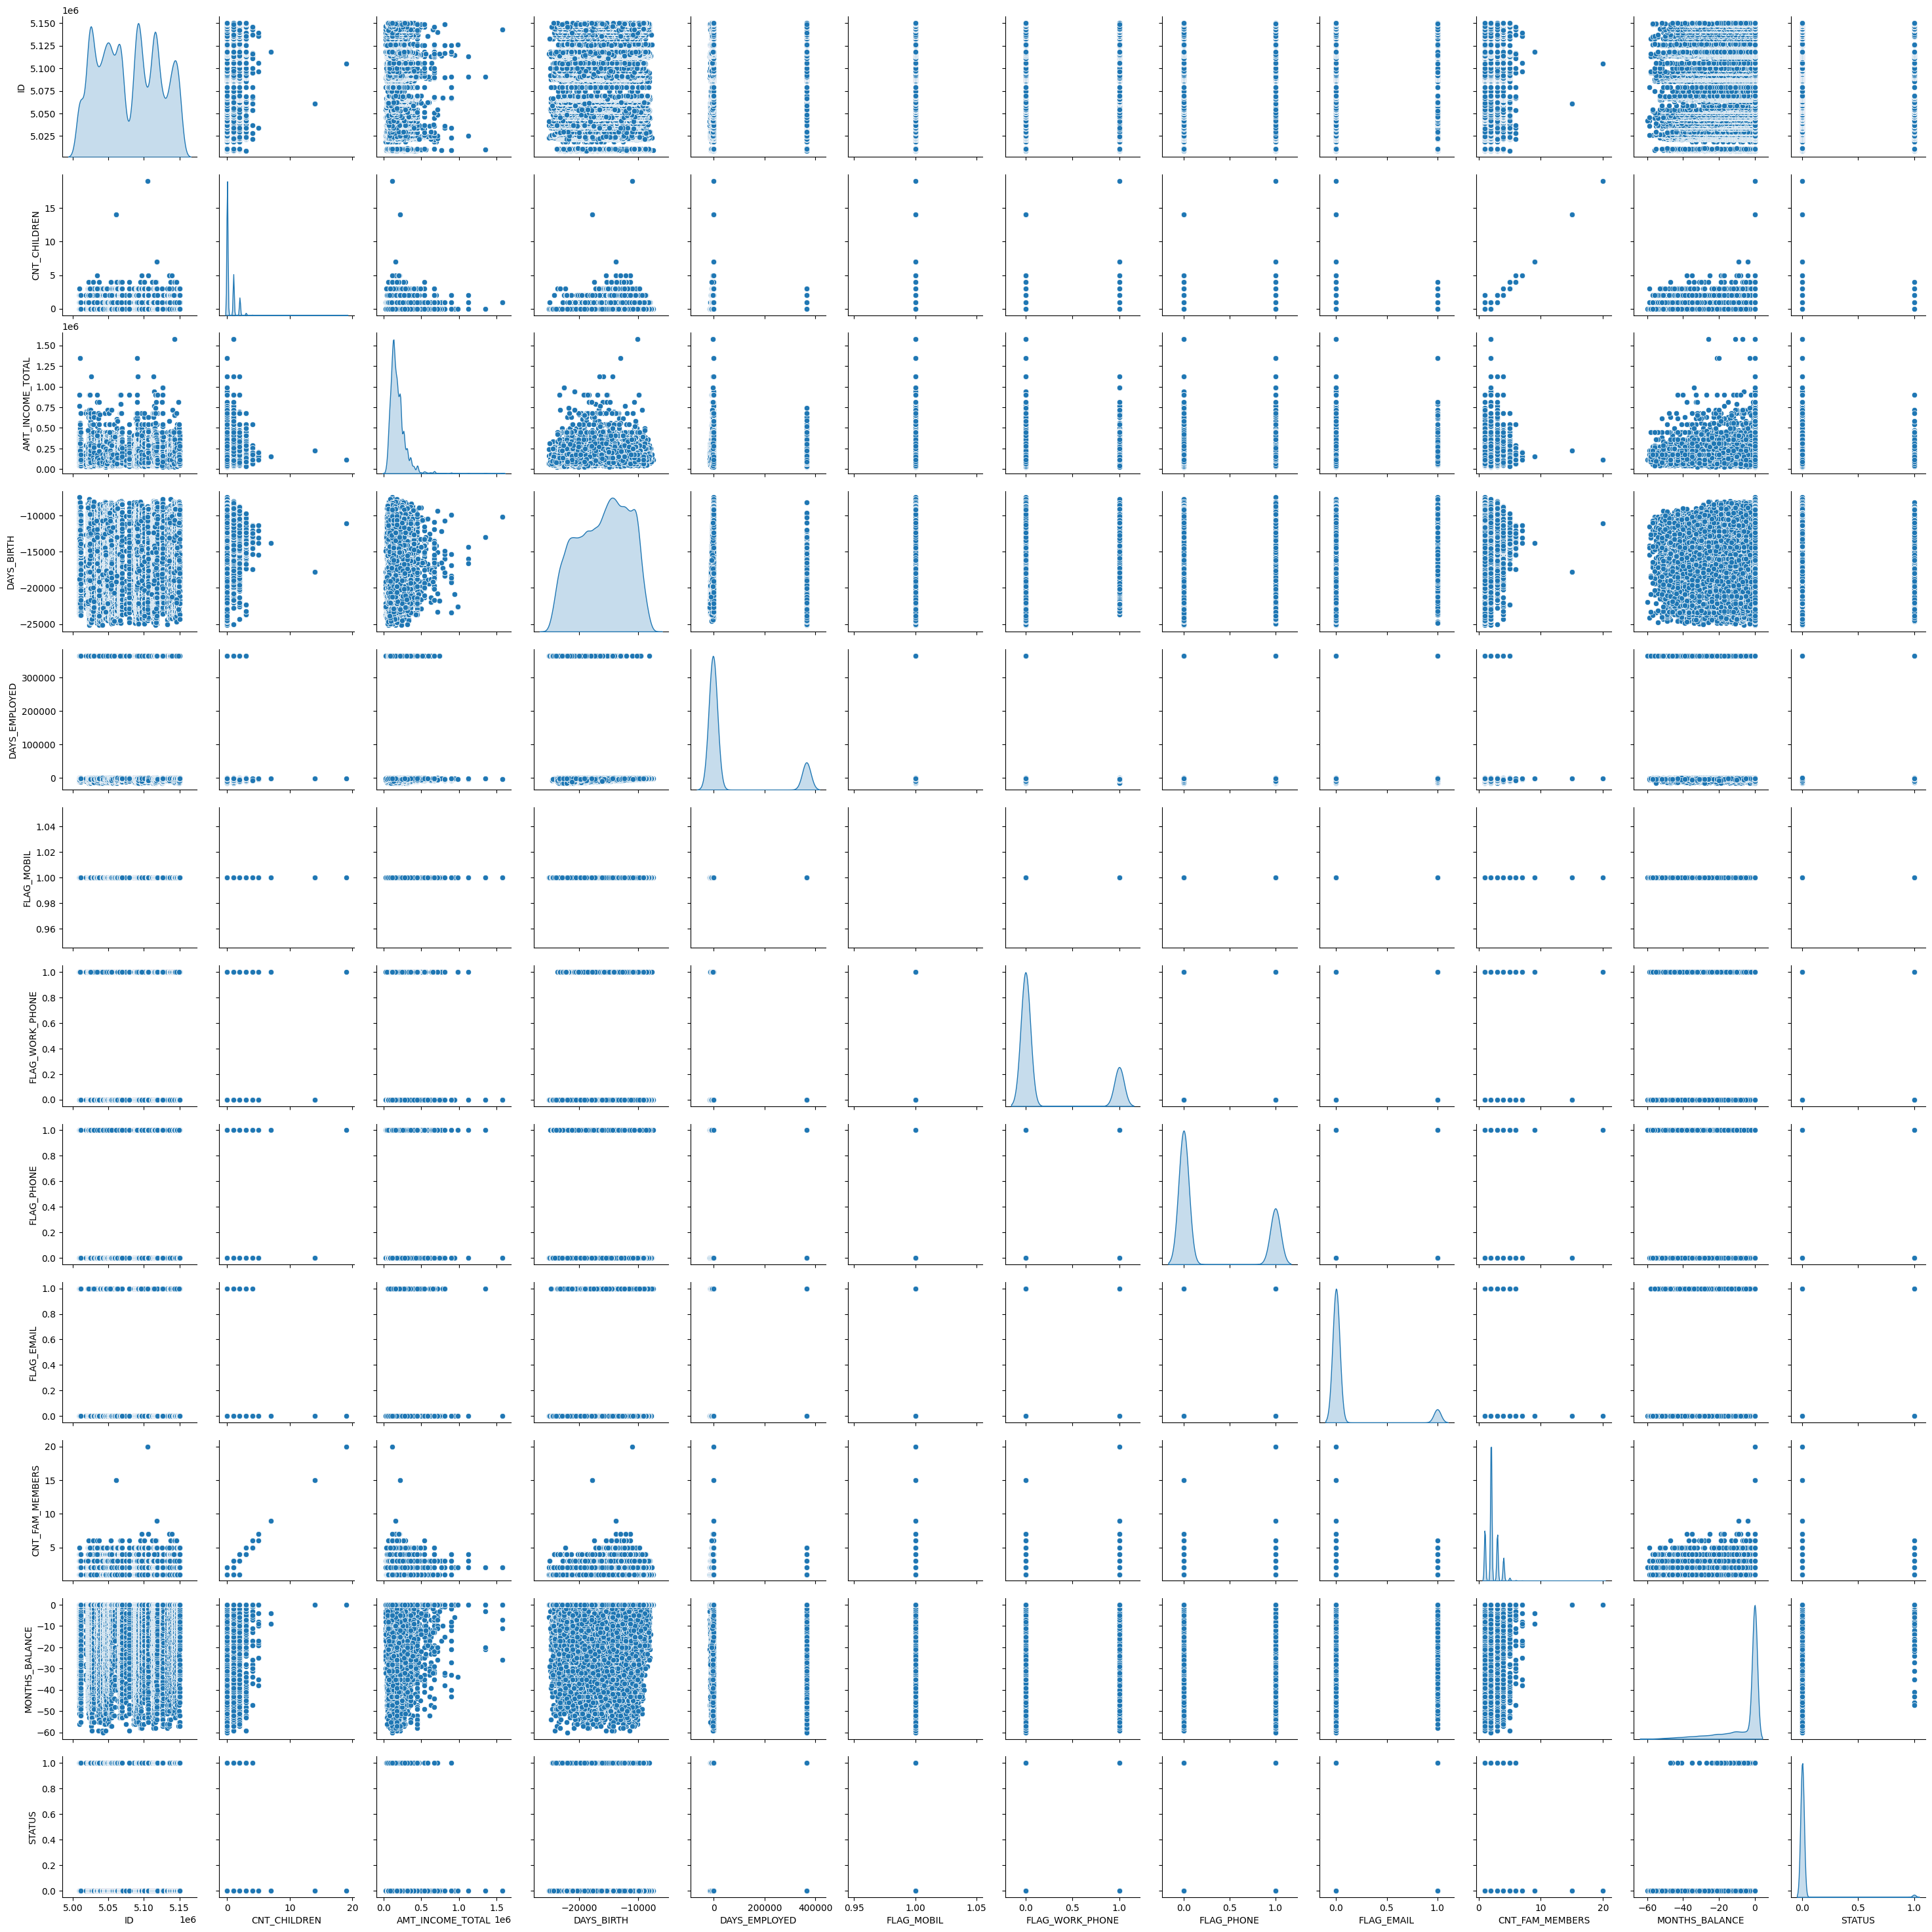

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set the figure size
plt.figure(figsize=(8, 6))
# Create the pair plot
sns.pairplot(merged_df, diag_kind='kde', markers='o')
# Show the plot
plt.show()

#### COUNT PLOT

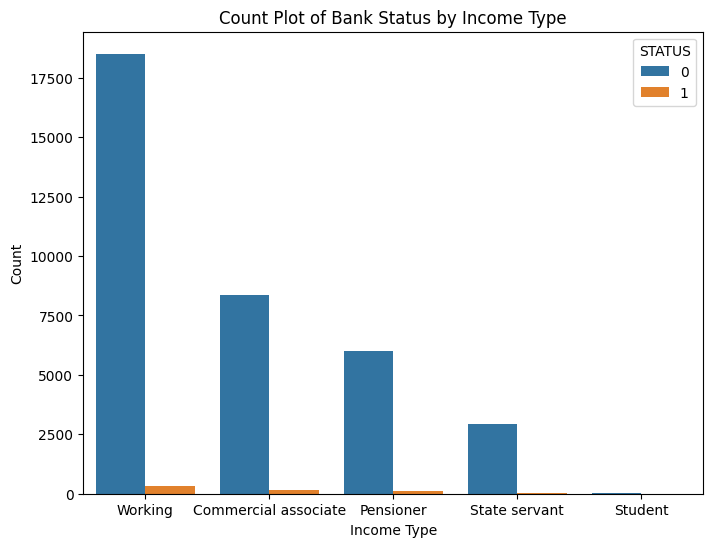

In [15]:
plt.figure(figsize=(8, 6))
# Create the count plot
sns.countplot(data=merged_df, x='NAME_INCOME_TYPE', hue='STATUS')
# Customize the plot if needed
plt.title('Count Plot of Bank Status by Income Type')
plt.xlabel('Income Type')
plt.ylabel('Count')
# Show the plot
plt.show()

#### PIE CHART

In [16]:
#Why converting? to find the effect of each column in the classification
#converting object datatype values to numeric columns
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for x in merged_df:
    if merged_df[x].dtypes=='object':
        merged_df[x]=l.fit_transform(merged_df[x])

In [17]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  int32  
 2   FLAG_OWN_CAR         36457 non-null  int32  
 3   FLAG_OWN_REALTY      36457 non-null  int32  
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  int32  
 7   NAME_EDUCATION_TYPE  36457 non-null  int32  
 8   NAME_FAMILY_STATUS   36457 non-null  int32  
 9   NAME_HOUSING_TYPE    36457 non-null  int32  
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

#### HEATMAP

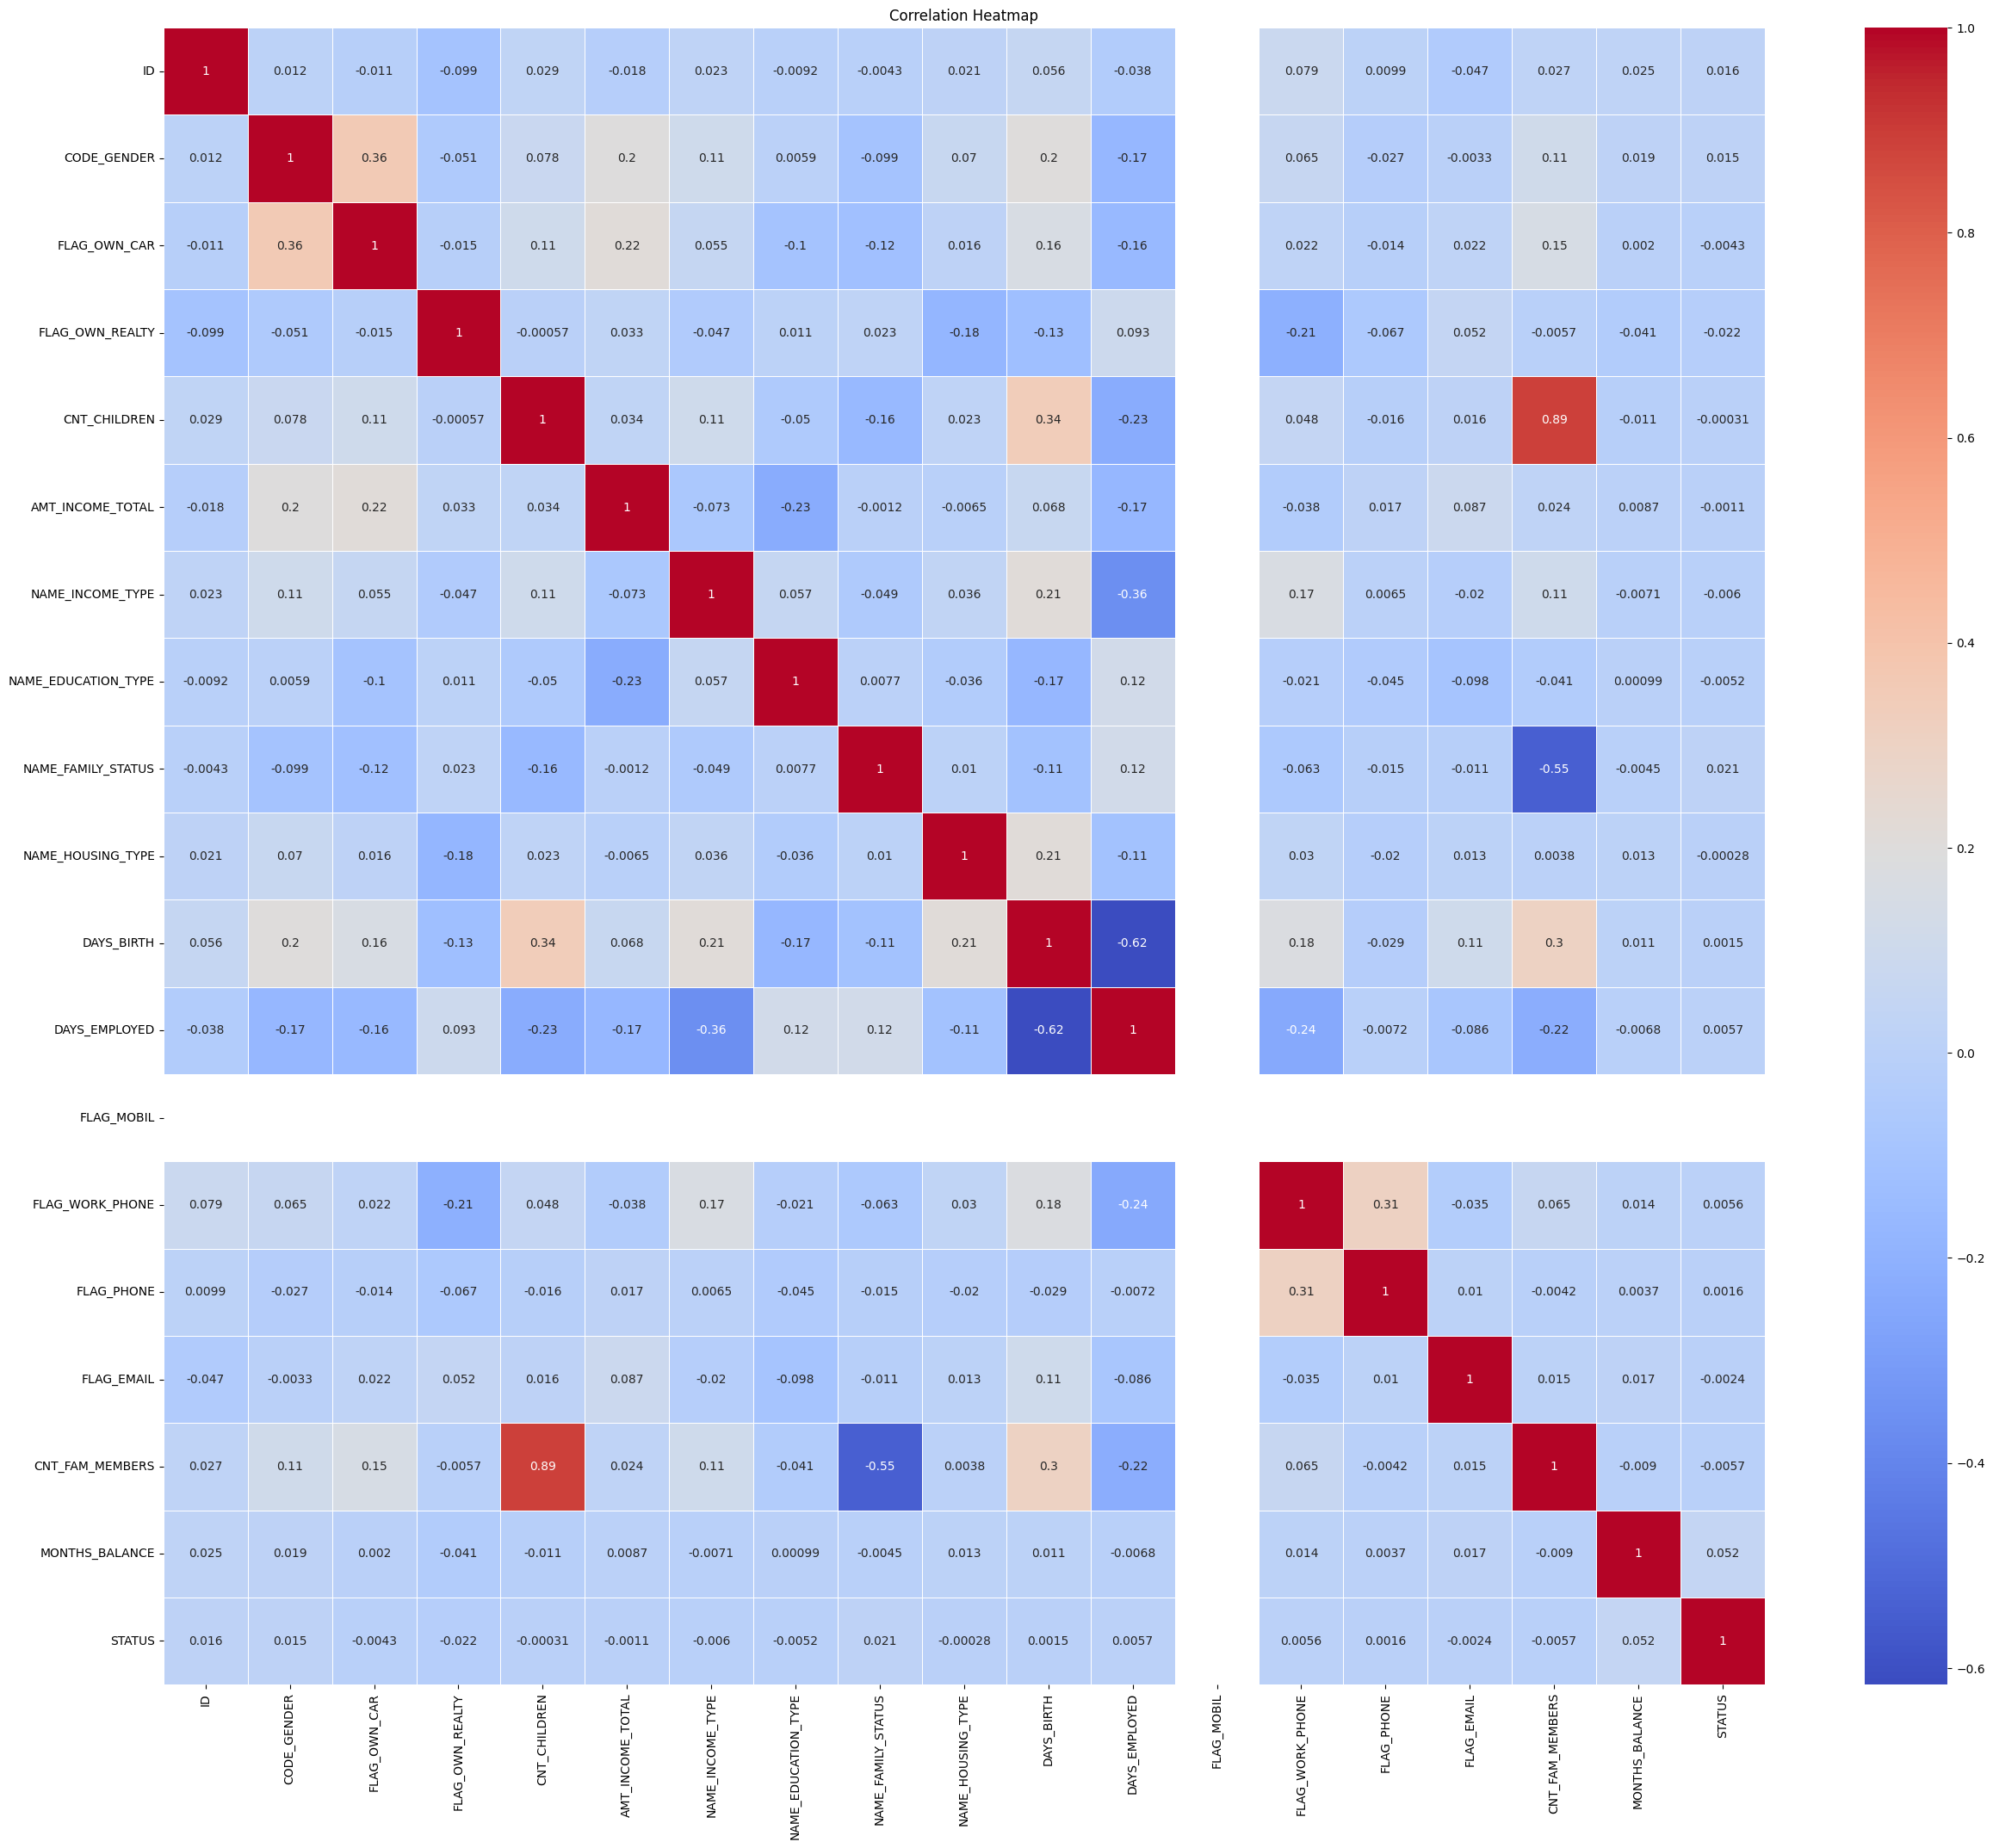

In [18]:
correlation_matrix = merged_df.corr()
# Set the figure size
plt.figure(figsize=(30, 25))
# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# Customize the plot if needed
plt.title('Correlation Heatmap')
plt.show()

In [19]:
#bar chart #box plot

## Storing Data in Database

In [20]:
import sqlite3
import pandas as pd

# Create a connection to the SQLite database (or create a new one if it doesn't exist)
conn = sqlite3.connect('my_database.db')
# Create a cursor object to execute SQL commands
cursor = conn.cursor()
# Create a table in the database and insert data into it
merged_df.to_sql('my_table', conn, if_exists='replace', index=False)
# Commit the changes and close the connection
conn.commit()
conn.close()

![image.png](attachment:image.png)

![image.png](attachment:image.png)

## Building Predictive model and testing

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

ACCURACY
Random Forest : 0.9808008776741635
Decision Tree : 0.9755896873285793
Logistic Regression : 0.9849149753154142
SVM :  0.9849149753154142
CLASSIFICATION REPORT
Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7182
           1       0.32      0.25      0.28       110

    accuracy                           0.98      7292
   macro avg       0.65      0.62      0.63      7292
weighted avg       0.98      0.98      0.98      7292

Decision Tree:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7182
           1       0.23      0.26      0.25       110

    accuracy                           0.98      7292
   macro avg       0.61      0.63      0.62      7292
weighted avg       0.98      0.98      0.98      7292

Logistic Regression: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7182
           1     

C:\Users\megha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\megha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\megha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

ACCURACY
Random Forest : 0.9803894679100384
Decision Tree : 0.9758639605046626
Logistic Regression : 0.9849149753154142
SVM :  0.9849149753154142


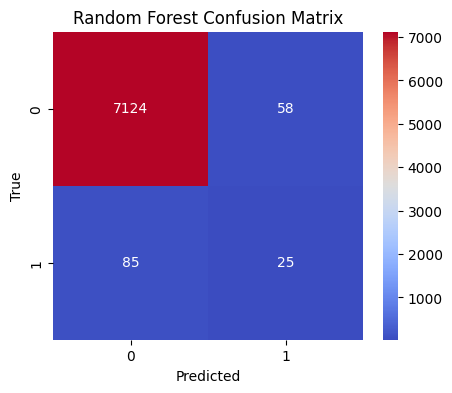

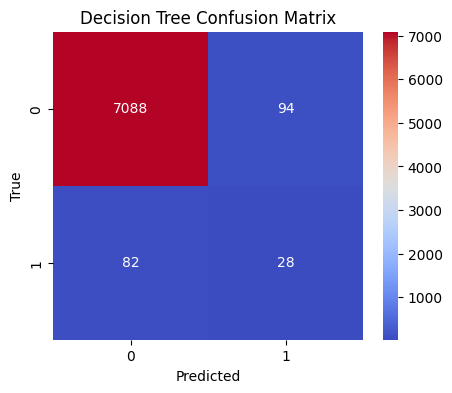

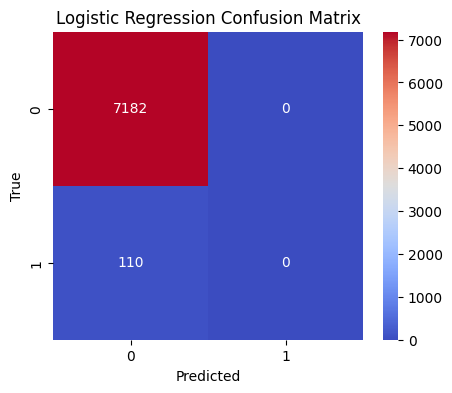

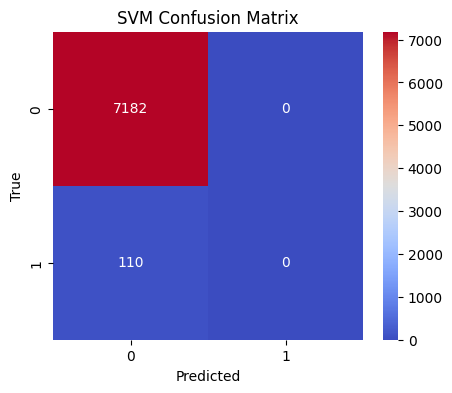

In [22]:
class APPPRED:
    def __init__(self, merged_df):
        self.x = merged_df.drop("STATUS", axis=1)
        self.y = merged_df["STATUS"]
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.x, self.y, test_size=0.2, random_state=10)
        self.rf_model = RandomForestClassifier()
        self.dtree = DecisionTreeClassifier()
        self.lr_model = LogisticRegression()
        self.svm_model = SVC()

    def train_models(self):
        self.rf_model.fit(self.x_train, self.y_train)
        self.dtree.fit(self.x_train, self.y_train)
        self.lr_model.fit(self.x_train, self.y_train)
        self.svm_model.fit(self.x_train, self.y_train)

    def evaluate_models(self):
        self.rf_preds = self.rf_model.predict(self.x_test)
        self.dt_preds = self.dtree.predict(self.x_test)
        self.lr_preds = self.lr_model.predict(self.x_test)
        self.svm_preds = self.svm_model.predict(self.x_test)

        self.rf_accuracy = accuracy_score(self.y_test, self.rf_preds)
        self.dt_accuracy = accuracy_score(self.y_test, self.dt_preds)
        self.lr_accuracy = accuracy_score(self.y_test, self.lr_preds)
        self.svm_accuracy = accuracy_score(self.y_test, self.svm_preds)

    def print_accuracy(self):
        print("ACCURACY")
        print("Random Forest :", self.rf_accuracy)
        print("Decision Tree :", self.dt_accuracy)
        print("Logistic Regression :", self.lr_accuracy)
        print("SVM : ", self.svm_accuracy)

    def print_classification_reports(self):
        print("CLASSIFICATION REPORT")
        print("Random Forest:")
        print(classification_report(self.y_test, self.rf_preds))
        print("Decision Tree:")
        print(classification_report(self.y_test, self.dt_preds))
        print("Logistic Regression: ")
        print(classification_report(self.y_test, self.lr_preds))
        print("SVM: ")
        print(classification_report(self.y_test, self.svm_preds))

    def generate_confusion_matrix_heatmap(self):
        models = ["Random Forest", "Decision Tree", "Logistic Regression", "SVM"]
        predictions = [self.rf_preds, self.dt_preds, self.lr_preds, self.svm_preds]

        for model, preds in zip(models, predictions):
            cm = confusion_matrix(self.y_test, preds)
            plt.figure(figsize=(5, 4))
            sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
            plt.title(f"{model} Confusion Matrix")
            plt.xlabel("Predicted")
            plt.ylabel("True")
            plt.show()

    def run_pipeline(self):
        self.train_models()
        self.evaluate_models()
        self.print_accuracy()
        self.generate_confusion_matrix_heatmap()

app_pred = APPPRED(merged_df)
app_pred.train_models()
app_pred.evaluate_models()
app_pred.print_accuracy()
app_pred.print_classification_reports()
app_pred.run_pipeline()
